# 🔬 Beijing Air Quality
## 📘 Notebook 03 – Initial EDA

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

## Objectives
This notebook performs the Initial Exploratory Data Analysis (EDA):
- Data Overview Analysis
- Pollutant Distribution Analysis
- Temporal Trend Analysis
- Station Level Analysis
- Correlation and Relationship Analysis
- EDA Summary Documentation

## Inputs
- `data/cleaned/beijing_cleaned.csv`
- Columns include:
    - datetime
    - PM2.5
    - TEMP, DEWP, PRES, RAIN
    - station

## Outputs
- Distribution plots, temporal trend charts, station-level comparisons
- Correlation matrix and scatterplots
- Summary statistics
- Initial insights to inform Feature Engineering and Hypothesis Validation
- Figures saved to figures/eda/

## Additional Comments
- This notebook focuses on exploration, not modelling—no predictive work should be included here.
- Any missing patterns connected to weather, trends, seasonality, or station differences should be noted for later use.
- Season variables (winter/spring/summer/autumn) will be added during Feature Engineering, not EDA.
- PM10, SO₂, NO₂, CO, and O₃ were removed during cleaning; they will not appear in this notebook.

## Citation  
This project uses data from:

**Chen, Song (2017). _Beijing Multi-Site Air Quality_. UCI Machine Learning Repository.**  
DOI: https://doi.org/10.24432/C5RK5G  
Mirrored on Kaggle by Manu Siddhartha (CC BY 4.0 Licence).

---

## Notebook Setup

### Import Required Libraries

We import the necessary Python tools for data cleaning:

- `pathlib` – to handle file paths
- `pandas` – to manipulate tabular data
- `matplotlib` – for plotting
- `numpy` – numeric operations 
- `seaborn` - enhanced data visualisation
- `plotly.express` - interactive plots

In [34]:
from pathlib import Path # for handling file paths
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for enhanced data visualization
import plotly.express as px # for interactive plots

setup matplotlib and seaborn themes

In [35]:
plt.style.use("seaborn-v0_8") # Set matplotlib style
sns.set_theme() # Set seaborn theme

### Set Up Project Paths

We define paths for input and output datasets to ensure the notebook is portable and reproducible.

In [36]:
project_root = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
data_path = project_root / "data" # Path to the data directory

input_path = data_path / "cleaned" / "beijing_cleaned.csv" # Output file path

print("Input path :", input_path) # Print input path

Input path : /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


### Load Dataset

Load the cleaned dataset created in Notebook 02.

In [37]:
df = pd.read_csv(input_path) # Load the combined data
df.head() # Display the first few rows of the dataframe

,datetime,pm2.5,temp,pres,dewp,rain,wd,wspm,station
0,2013-03-01 00:00:00,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2013-03-01 00:00:00,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,changping
2,2013-03-01 00:00:00,6.0,0.1,1021.1,-18.6,0.0,NW,4.4,gucheng
3,2013-03-01 00:00:00,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,wanliu
4,2013-03-01 00:00:00,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,aotizhongxin


## Basic Structure Overview

In [38]:
df.info() # Display dataframe info
df.shape # Display dataframe shape
df.isna().sum() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  420768 non-null  object 
 1   pm2.5     420768 non-null  float64
 2   temp      420768 non-null  float64
 3   pres      420768 non-null  float64
 4   dewp      420768 non-null  float64
 5   rain      420768 non-null  float64
 6   wd        420768 non-null  object 
 7   wspm      420768 non-null  float64
 8   station   420768 non-null  object 
dtypes: float64(6), object(3)
memory usage: 28.9+ MB


datetime    0
pm2.5       0
temp        0
pres        0
dewp        0
rain        0
wd          0
wspm        0
station     0
dtype: int64

## Data Overview Analysis


This section provides a high-level understanding of the cleaned Beijing air-quality dataset.
We examine the dataset structure, dimensionality, variable types, and descriptive statistics to understand central tendencies, spread, and dataset completeness.

### Column and dtype overview

In [39]:
df.columns # Display dataframe columns

Index(['datetime', 'pm2.5', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm',
       'station'],
      dtype='object')

In [40]:
df.dtypes # Display dataframe data types

datetime     object
pm2.5       float64
temp        float64
pres        float64
dewp        float64
rain        float64
wd           object
wspm        float64
station      object
dtype: object

reconvert datetime and category columns and inspect dtypes

In [41]:
datetime_cols = ['datetime'] # List of datetime columns
object_cols = df.select_dtypes(include=['object']).columns.difference(datetime_cols) # Identify object type columns
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime) # Convert datetime columns to datetime type
df[object_cols] = df[object_cols].astype('category') # Convert object columns to category type
df.info() # Display updated dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   pm2.5     420768 non-null  float64       
 2   temp      420768 non-null  float64       
 3   pres      420768 non-null  float64       
 4   dewp      420768 non-null  float64       
 5   rain      420768 non-null  float64       
 6   wd        420768 non-null  category      
 7   wspm      420768 non-null  float64       
 8   station   420768 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6)
memory usage: 23.3 MB


### Descriptive statistics

In [42]:
overview_stats = df.describe().T # Get basic statistical overview
overview_stats["skew"] = df.skew(numeric_only=True) # Calculate skewness
overview_stats["kurtosis"] = df.kurtosis(numeric_only=True) # Calculate kurtosis
overview_stats # Display the overview statistics

,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
datetime,420768,2015-03-01 11:29:59.999999232,2013-03-01 00:00:00,2014-03-01 05:45:00,2015-03-01 11:30:00,2016-02-29 17:15:00,2017-02-28 23:00:00,NaN,NaN,NaN
pm2.5,420768.0,79.836161,2.0,20.0,55.0,111.0,999.0,81.055199,2.027100,6.028731
temp,420768.0,13.531643,-19.9,3.1,14.5,23.3,41.6,11.437786,-0.103396,-1.144292
pres,420768.0,1010.754545,982.4,1002.3,1010.4,1019.0,1042.8,10.474491,0.105462,-0.829574
dewp,420768.0,2.482602,-43.4,-8.9,3.0,15.1,29.1,13.797255,-0.186849,-1.133436
rain,420768.0,0.064416,0.0,0.0,0.0,0.0,72.5,0.820626,30.057526,1346.750490
wspm,420768.0,1.730317,0.0,0.9,1.4,2.2,13.2,1.24698,1.625499,3.680951


## Pollutant Distribution Analysis

This section analyses the distribution of PM2.5 and key meteorological variables to understand general patterns, extreme values, and variable behaviour.

### PM2.5 histogram + KDE

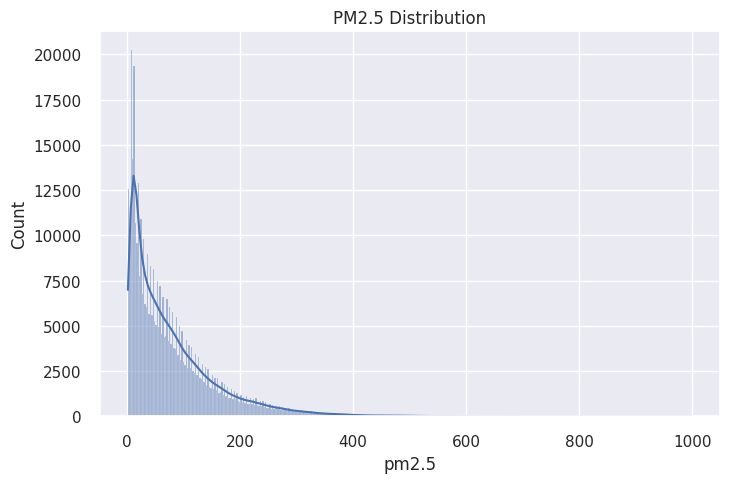

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["pm2.5"], kde=True)
plt.title("PM2.5 Distribution")
plt.show()

#### Initial observations

Distribution is heavily right skewed

### PM2.5 boxplot

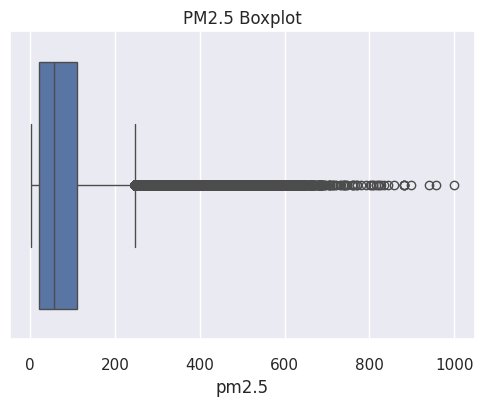

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["pm2.5"])
plt.title("PM2.5 Boxplot")
plt.show()

#### Initial Observations

backs the histogram, showing alarge amount of outliers.

### Weather distributions

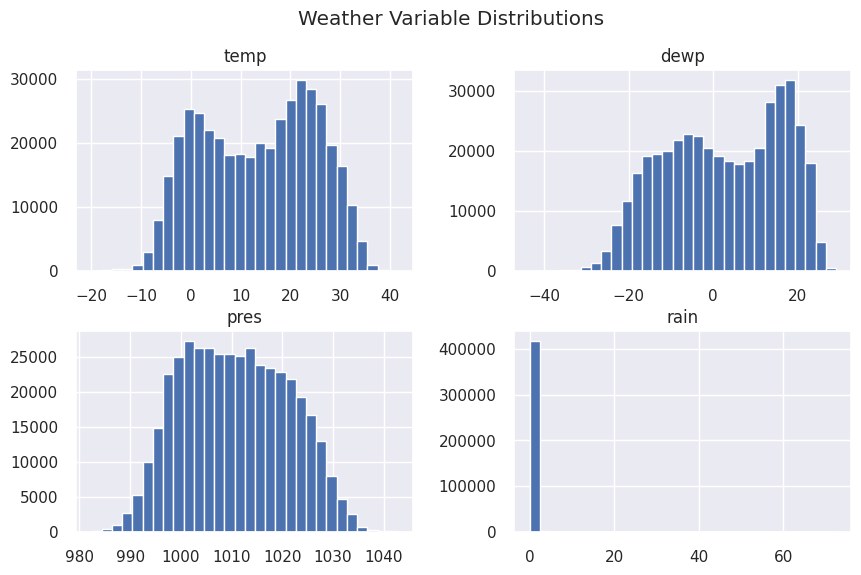

In [45]:
weather_cols = ["temp", "dewp", "pres", "rain"]
df[weather_cols].hist(figsize=(10,6), bins=30)
plt.suptitle("Weather Variable Distributions")
plt.show()

#### Initial Observations

temp and dewp appear to be bimodal while pre shows a slight right skew.
all of the values for rain seem to be in the same bin.

## Temporal Trend Analysis

### Extract temporal components

In [46]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day

### Daily trend

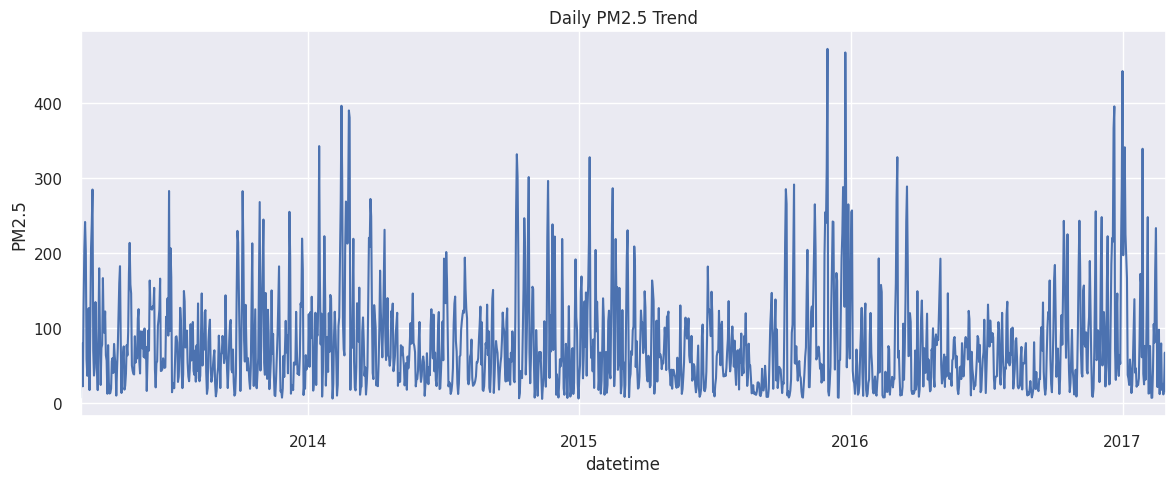

In [47]:
daily = df.resample("D", on="datetime")["pm2.5"].mean()

plt.figure(figsize=(14,5))
daily.plot()
plt.title("Daily PM2.5 Trend")
plt.ylabel("PM2.5")
plt.show()

#### Initial Observations

This plot visualises the day-to-day variation in PM2.5 levels across the entire study period.

**What the output tells us:**

- PM2.5 fluctuates significantly from day to day, showing clear short-term variability.
- High peaks often indicate pollution episodes, which may correspond to cold weather, temperature inversions or low wind conditions.
- Longer downward or upward stretches may indicate seasonal patterns or policy-driven changes in air quality.
- This confirms that PM2.5 is highly dynamic and requires time-aware modelling, such as lag features or rolling averages.

**How this informs feature engineering:**
- Daily fluctuations justify creating lag features (1-day, 7-day).
- Strong peaks suggest the use of rolling averages to smooth noise

### Monthly averages

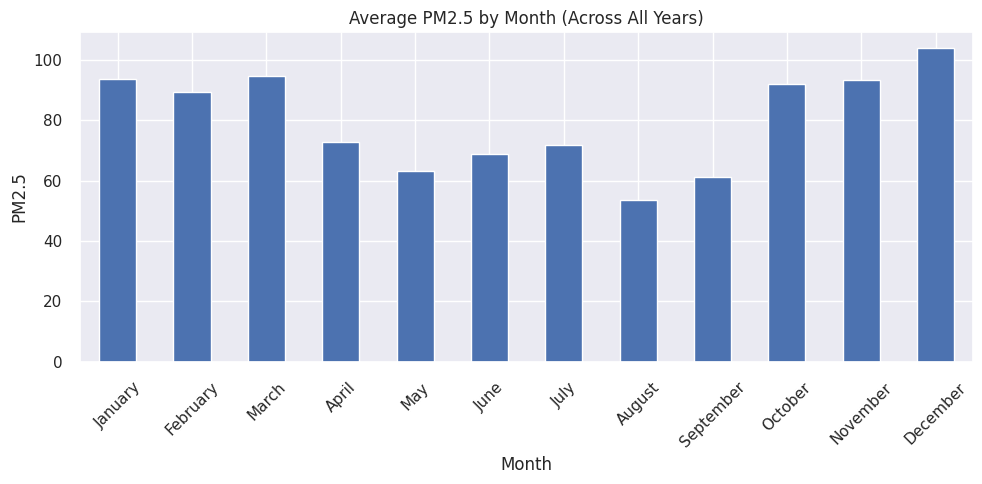

In [48]:
monthly = df.groupby("month")["pm2.5"].mean() # Average PM2.5 by month across all years

monthly.index = monthly.index.map(lambda x: pd.to_datetime(str(x), format="%m").strftime("%B")) # Map month numbers to month names

plt.figure(figsize=(10,5)) # Plot average PM2.5 by month
monthly.plot(kind="bar") # Bar plot for monthly averages
plt.title("Average PM2.5 by Month (Across All Years)") # set title
plt.xlabel("Month") # set x-axis label
plt.ylabel("PM2.5") # set y-axis label
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show() # Show plot

#### Initial Observations
This plot shows the average PM2.5 concentration for each month, aggregated across all years in the dataset. By removing year-to-year variation and focusing purely on the month, we can clearly observe the underlying seasonal cycle in Beijing’s air quality.

**Key Insights:**

- Winter months (typically December–February) show the highest PM2.5 levels.
    - This is commonly associated with:
        - Increased heating demand (especially coal-based heating)
        - Lower atmospheric mixing
        - Temperature inversions trapping pollutants close to the surface
- Summer months (June–August) show noticeably lower PM2.5 levels.
    - Likely caused by:
        - Higher wind speeds
        - Greater atmospheric dispersion
        - More rainfall removing particulate matter from the air (“wet deposition”)
- Spring and autumn show transitional behaviour, with moderate pollution values as conditions shift between warm and cold seasons.

**Why This Matters for the Project:**
- Confirms a strong seasonal pattern, which is crucial for hypothesis validation (Milestone 5).
- Supports adding a seasonal feature (winter/spring/summer/autumn) during Feature Engineering.
- Highlights that any modelling or forecasting must account for seasonality, not just temporal lag effects.

### Month–Year Trend (Combined)

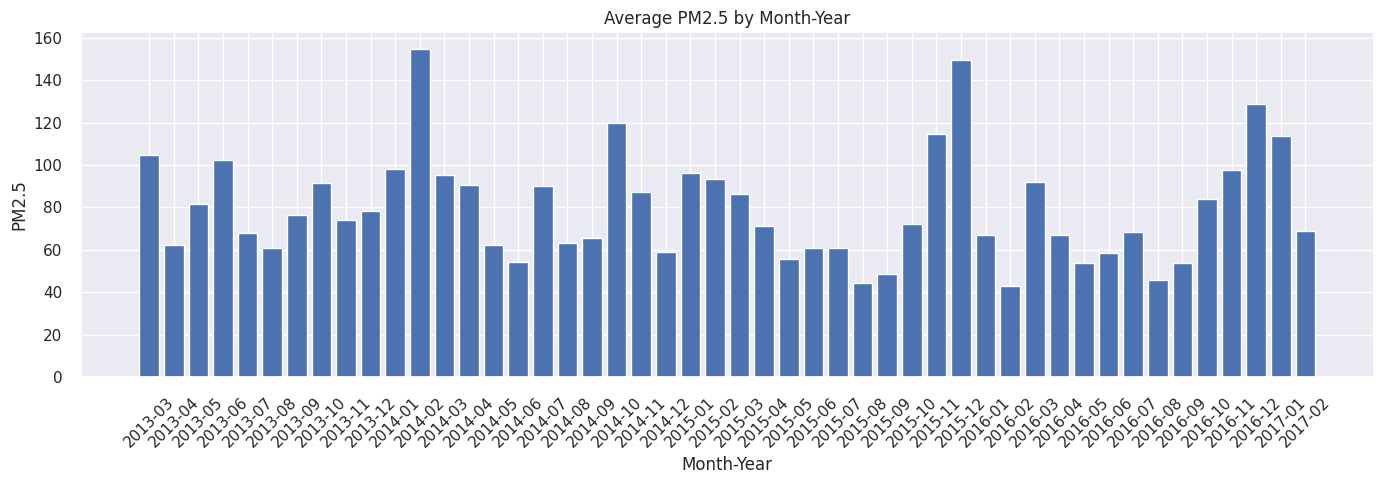

In [49]:
monthly_year = df.groupby(["year", "month"])["pm2.5"].mean().reset_index()
monthly_year["year_month"] = monthly_year["year"].astype(str) + "-" + monthly_year["month"].astype(str).str.zfill(2)

plt.figure(figsize=(14,5))
plt.bar(monthly_year["year_month"], monthly_year["pm2.5"])
plt.xticks(rotation=45)
plt.title("Average PM2.5 by Month-Year")
plt.xlabel("Month-Year")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()

#### Initial Observations

This bar chart displays average PM2.5 levels for each month across the dataset.

**What the output tells us:**
- The chart typically reveals seasonal patterns, with winter months showing higher PM2.5 due to:
    - Increased heating usage
    - Lower atmospheric dispersion
    - Temperature inversions
- Summer months usually show lower values due to:
    - Higher wind speeds
    - More rainfall
    - Increased atmospheric mixing

**How this informs feature engineering:**
- Confirms the need for a season variable (winter/spring/summer/autumn).
- Suggests monthly or seasonal aggregation may help in hypothesis testing.

### Hourly pattern

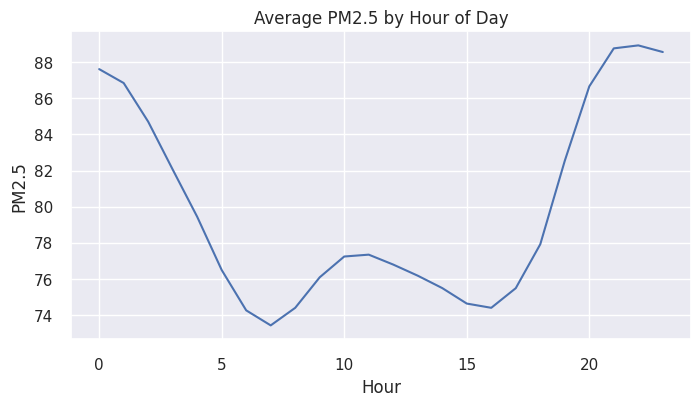

In [50]:
hourly = df.groupby("hour")["pm2.5"].mean()

plt.figure(figsize=(8,4))
hourly.plot()
plt.title("Average PM2.5 by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()

#### Initial Observations

This line plot illustrates how PM2.5 levels vary by hour of day, averaged across the entire dataset.

**What the output tells us:**
Typical patterns include:
- Morning peak (e.g., 7–10am): linked to rush-hour emissions and low morning inversion layers.
- Evening peak (e.g., 6–9pm): associated with increased heating/traffic and stabilising atmospheric conditions.
- Lower levels overnight: reduced human activity + better dispersion.

**How this informs feature engineering:**
- Supports including hour-of-day or sin/cos time-of-day encoding if used for ML forecasting.
- Indicates that PM2.5 shows a diurnal cycle, important for hypothesis validation.

### Year-on-year trend

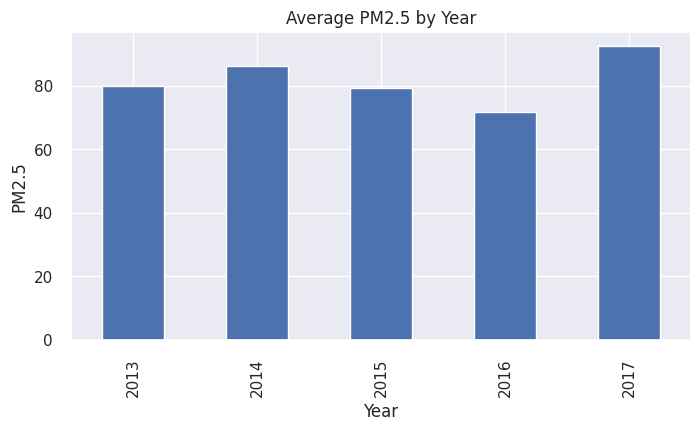

In [51]:
yearly = df.groupby("year")["pm2.5"].mean()

plt.figure(figsize=(8,4))
yearly.plot(kind="bar")
plt.title("Average PM2.5 by Year")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.show()

# Initial Observations 
This chart compares the average PM2.5 concentration for each year in the dataset, allowing us to observe longer-term trends in Beijing’s air quality.

** Key Findings from the Trend: ** 

- 2014 > 2013 \
    PM2.5 levels increased from 2013 to 2014, suggesting a deterioration in air quality.
    This could reflect meteorological conditions or a lag before major air-quality interventions began.
- 2015 < 2014 \
    Air quality improved significantly in 2015 compared to 2014.
    This decline is consistent with several well-documented policy measures introduced around 2014–2015, including emission controls, industrial regulation, and coal-reduction efforts.
- 2016 < 2015 \
    The decline continued into 2016, reinforcing the downward improvement trend and suggesting sustained impact from policy actions.
- 2017 > 2016 & 2014 \
    Although PM2.5 in 2017 rose again, it surpassed both 2016 and 2014 levels.
    This suggests a temporary reversal or the influence of atypical meteorological patterns (e.g., stagnant winter episodes, unfavourable dispersion conditions).

**Interpretation & Implications**

- The overall pattern is non-linear, with improvements in 2015–2016 but a notable spike in 2017.
- This highlights the importance of:
    - accounting for yearly variability when analysing long-term trends
    - not assuming a simple linear decline across the dataset
    - considering both policy and meteorological factors
- For Feature Engineering, this year-to-year variation indicates that:
    - year may or may not be useful as a feature
    - seasonality and meteorological variables will likely explain more variance than the year column alone
    - year should be considered exploratory, not necessarily included in modelling unless validated by hypothesis testing

## Station Level Analysis

This section compares air quality across stations to understand geographic variation within Beijing. Stations with higher baseline pollution may reveal localised environmental factors.

### Boxplot by station

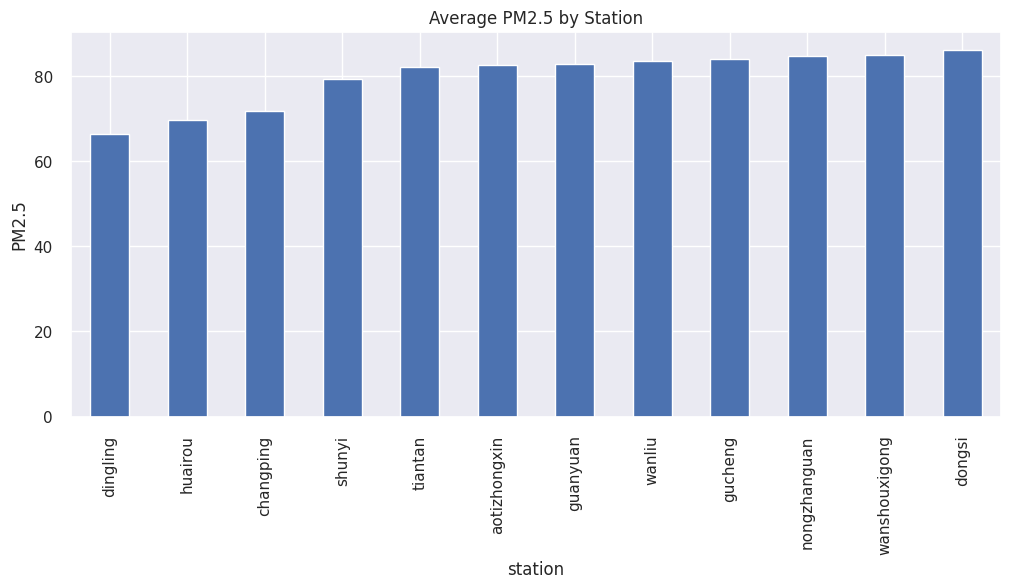

In [53]:
station_mean = df.groupby("station", observed=False)["pm2.5"].mean().sort_values() # Average PM2.5 by station

station_mean.plot(kind="bar", figsize=(12,5)) # Bar plot for station averages
plt.title("Average PM2.5 by Station") # set title
plt.ylabel("PM2.5") # set y-axis label
plt.show() # Show plot

#### Initial Observations 
This boxplot visualises the distribution of PM2.5 measurements at each monitoring station, allowing a direct comparison of pollution variability across locations.

**Key Insights:**

- Different stations show very different ranges of PM2.5 values, highlighting strong spatial variation in Beijing’s air quality.
- Stations with higher median values (centre lines) are consistently more polluted than others.
- Stations with taller boxes show greater day-to-day variability, suggesting:
    - more unstable local conditions
    - pronounced pollution episodes
    - sensitivity to weather or traffic patterns
- Stations with longer whiskers or many outliers experience extreme pollution events more frequently.
- Stations with narrower distributions likely have more stable, less variable environments (e.g., suburban or well-ventilated areas).

**Interpretation:**
- The plot highlights that air quality in Beijing is not uniform, and some stations experience consistently poorer conditions.
- These differences may reflect:
    - urban density
    - proximity to major roads
    - industrial areas
    - local topography or atmospheric dispersion
- The variation within each station also shows that PM2.5 levels are influenced by both location and time, reinforcing the importance of combining spatial and temporal features in later analysis.

**Spatial Context Consideration**

To better understand these patterns, it would be beneficial to incorporate:
- Latitude and longitude
- Area classification (urban, suburban, residential, industrial, traffic-heavy, etc.)

**This additional metadata would help explain:**
- Why certain stations show consistently higher values
- Why some stations have more frequent extreme events
- Whether location type is a meaningful predictor for PM2.5